In [1]:
import math
from datetime import timedelta
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from parcels import (
    AdvectionRK4,
    FieldSet,
    JITParticle,
    ParticleSet,
    Variable,
    download_example_dataset,
)

/home/users/graemem/miniconda3/envs/parcels/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
rootdir = "/gws/nopw/j04/co2clim/datasets/bSOSE/ITER133/"
filenames = {'U':rootdir+'bsose_i133_2013to2018_5day_Uvel.nc',
             'V':rootdir+'bsose_i133_2013to2018_5day_Vvel.nc',
             'W':rootdir+'bsose_i133_2013to2018_5day_Wvel.nc',
             'T':rootdir+'bsose_i133_2013to2018_5day_Theta.nc',
             'S':rootdir+'bsose_i133_2013to2018_5day_Salt.nc',
             'MLD':rootdir+'bsose_i133_2013to2018_5day_MLD.nc'}
variables = {'U': 'UVEL',
             'V': 'VVEL',
             'W': 'WVEL',
             'T': 'THETA',
             'S': 'SALT',
             'MLD': 'BLGMLD'}
dimensions = {'U':{'lon':'XG','lat':'YC','depth':'Z','time':'time'},
             'V':{'lon':'XC','lat':'YG','depth':'Z','time':'time'},
             'W':{'lon':'XC','lat':'YC','depth':'Zl','time':'time'},
             'T':{'lon':'XC','lat':'YC','depth':'Z','time':'time'},
             'S':{'lon':'XC','lat':'YC','depth':'Z','time':'time'},
             'MLD':{'lon':'XC','lat':'YC','time':'time'}}
fs = FieldSet.from_netcdf(filenames,variables,dimensions,
                          deferred_load=True,gridindexingtype='mitgcm')

In [10]:
fs.U.data[0,0, :, :].shape

(588, 2160)

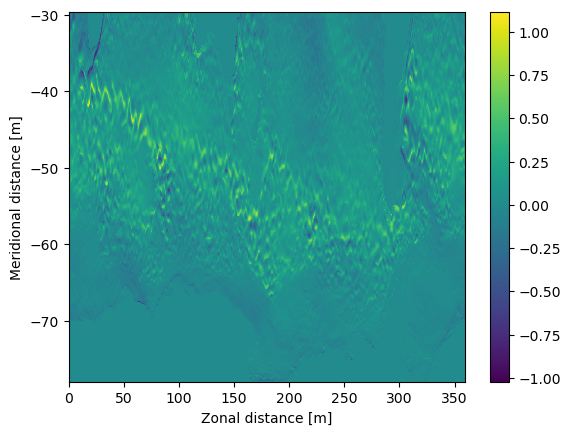

In [11]:
fs.computeTimeChunk()

plt.pcolormesh(fs.U.grid.lon, fs.U.grid.lat, fs.U.data[0, 0, :, :])
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.colorbar()
plt.show()

In [30]:
import numpy as np
path = '../../data/Shelf.level-1000.sep-500.txt'
init = np.transpose(np.loadtxt(path))

In [49]:
pset = ParticleSet.from_list(
    fieldset=fs,  # the fields on which the particles are advected
    pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
    lon=init[0,:],  # a vector of release longitudes
    lat=init[1,:],  # a vector of release latitudes
    depth=-10*np.ones(len(init[0,:])),
)

In [50]:
print(pset)

P[51](lon=0.416667, lat=-69.702583, depth=-10.000000, time=not_yet_set)
P[52](lon=0.250000, lat=-69.690720, depth=-10.000000, time=not_yet_set)
P[53](lon=11.541667, lat=-69.267166, depth=-10.000000, time=not_yet_set)
P[54](lon=22.750000, lat=-70.077629, depth=-10.000000, time=not_yet_set)
P[55](lon=31.983335, lat=-67.866905, depth=-10.000000, time=not_yet_set)
P[56](lon=37.083336, lat=-68.741676, depth=-10.000000, time=not_yet_set)
P[57](lon=46.750000, lat=-66.695648, depth=-10.000000, time=not_yet_set)
P[58](lon=46.916668, lat=-66.642853, depth=-10.000000, time=not_yet_set)
P[59](lon=55.583336, lat=-65.686188, depth=-10.000000, time=not_yet_set)
P[60](lon=65.250000, lat=-66.790825, depth=-10.000000, time=not_yet_set)
P[61](lon=75.916672, lat=-66.875999, depth=-10.000000, time=not_yet_set)
P[62](lon=84.125000, lat=-65.768806, depth=-10.000000, time=not_yet_set)
P[63](lon=93.805557, lat=-64.793205, depth=-10.000000, time=not_yet_set)
P[64](lon=102.916672, lat=-64.864090, depth=-10.00000

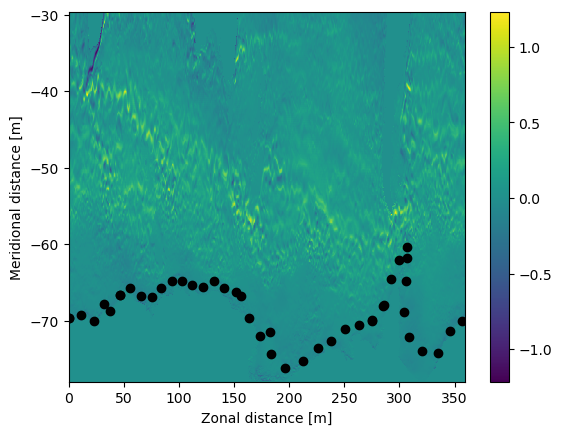

In [51]:
plt.pcolormesh(fs.U.grid.lon, fs.U.grid.lat, fs.U.data[0, 0, :, :])
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.colorbar()

plt.plot(pset.lon, pset.lat, "ko")
plt.show()

In [52]:
def DeleteErrorParticle(particle, fieldset, time):
    if particle.state == StatusCode.ErrorOutOfBounds:
        particle.delete()

In [53]:
output_file = pset.ParticleFile(
    name="TestParticles.zarr",  # the file name
    outputdt=timedelta(hours=1),  # the time step of the outputs
)
pset.execute(
    AdvectionRK4+pset.Kernel(DeleteErrorParticle),  # the kernel (which defines how particles move)
    runtime=timedelta(days=3),  # the total length of the run
    dt=-1*timedelta(minutes=60*24),  # the timestep of the kernel
    output_file=output_file,
)

INFO: Output files are stored in TestParticles.zarr.
100%|██████████| 259200.0/259200.0 [02:10<00:00, 1978.79it/s]


P[51](lon=0.711492, lat=-69.734383, depth=-10.000000, time=188528400.000000)
P[52](lon=0.535075, lat=-69.712471, depth=-10.000000, time=188528400.000000)
P[53](lon=12.042068, lat=-69.248199, depth=-10.000000, time=188528400.000000)
P[54](lon=23.324919, lat=-70.136559, depth=-10.000000, time=188528400.000000)
P[55](lon=32.248604, lat=-67.666412, depth=-10.000000, time=188528400.000000)
P[56](lon=37.154919, lat=-68.724648, depth=-10.000000, time=188528400.000000)
P[57](lon=46.964500, lat=-66.665047, depth=-10.000000, time=188528400.000000)
P[58](lon=47.102364, lat=-66.593826, depth=-10.000000, time=188528400.000000)
P[59](lon=55.934177, lat=-65.706825, depth=-10.000000, time=188528400.000000)
P[60](lon=65.504066, lat=-66.813263, depth=-10.000000, time=188528400.000000)
P[61](lon=76.278969, lat=-66.806206, depth=-10.000000, time=188528400.000000)
P[62](lon=84.631897, lat=-65.836983, depth=-10.000000, time=188528400.000000)
P[63](lon=94.774796, lat=-64.710121, depth=-10.000000, time=188528

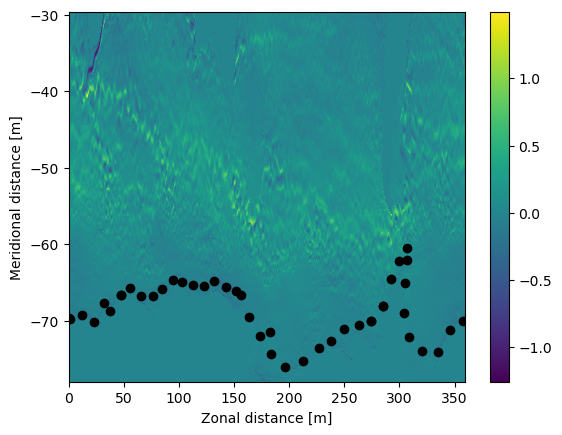

In [54]:
print(pset)

plt.pcolormesh(fs.U.grid.lon, fs.U.grid.lat, fs.U.data[0, 0, :, :])
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.colorbar()

# plt.gca().set_xlim([190,210])
# plt.gca().set_ylim([-65,-55])

plt.plot(pset.lon, pset.lat, "ko")
plt.show()


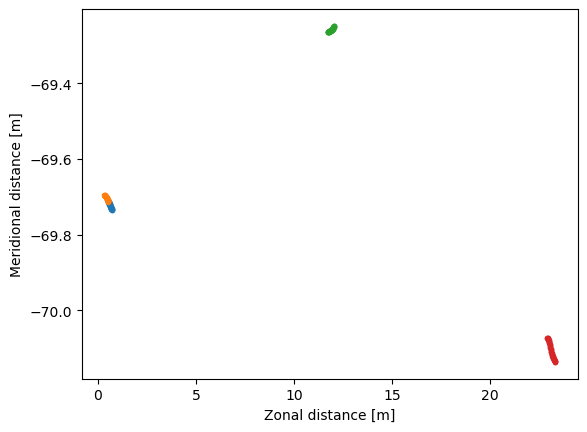

In [55]:
ds = xr.open_zarr("TestParticles.zarr").isel(trajectory=slice(0,4))

plt.plot(ds.lon.T, ds.lat.T, ".-")
plt.xlabel("Zonal distance [m]")
plt.ylabel("Meridional distance [m]")
plt.show()

In [56]:
fs.U.grid.lon[0]

5.551115e-17

In [57]:
fs.U.grid.lon[-1]

359.83334

In [58]:
fs.U.data

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [-0.04011441, -0.03819781, -0.02068885, ..., -0.01104586,
          -0.01280085, -0.02862814],
         [ 0.00099727, -0.00497273,  0.00040801, ...,  0.00413232,
           0.01462717,  0.01332433],
         [ 0.01294467,  0.00684757,  0.00159042, ..., -0.00368796,
           0.00406874,  0.01409955]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [-0.05701273, -0.05510505